In [1]:
with open('output1.txt', 'r') as input:
    text = input.read().split('\n')
text

['OpenCL NVIDIA GeForce GTX 1050 Ti',
 'float n 10000000 group 8 time 0.00566580001031979918',
 'float n 20000000 group 8 time 0.01074769999831914902',
 'float n 30000000 group 8 time 0.01562859999830834568',
 'float n 40000000 group 8 time 0.02223750000121071935',
 'float n 50000000 group 8 time 0.02677130000665783882',
 'float n 60000000 group 8 time 0.03176169999642297626',
 'float n 70000000 group 8 time 0.03721290000248700380',
 'float n 80000000 group 8 time 0.04027260001748800278',
 'float n 90000000 group 8 time 0.04575809999369084835',
 'float n 10000000 group 16 time 0.00554630000260658562',
 'float n 20000000 group 16 time 0.01086040001246146858',
 'float n 30000000 group 16 time 0.01567510000313632190',
 'float n 40000000 group 16 time 0.02095460001146420836',
 'float n 50000000 group 16 time 0.02697159998933784664',
 'float n 60000000 group 16 time 0.03078070000628940761',
 'float n 70000000 group 16 time 0.03629059999366290867',
 'float n 80000000 group 16 time 0.04225580

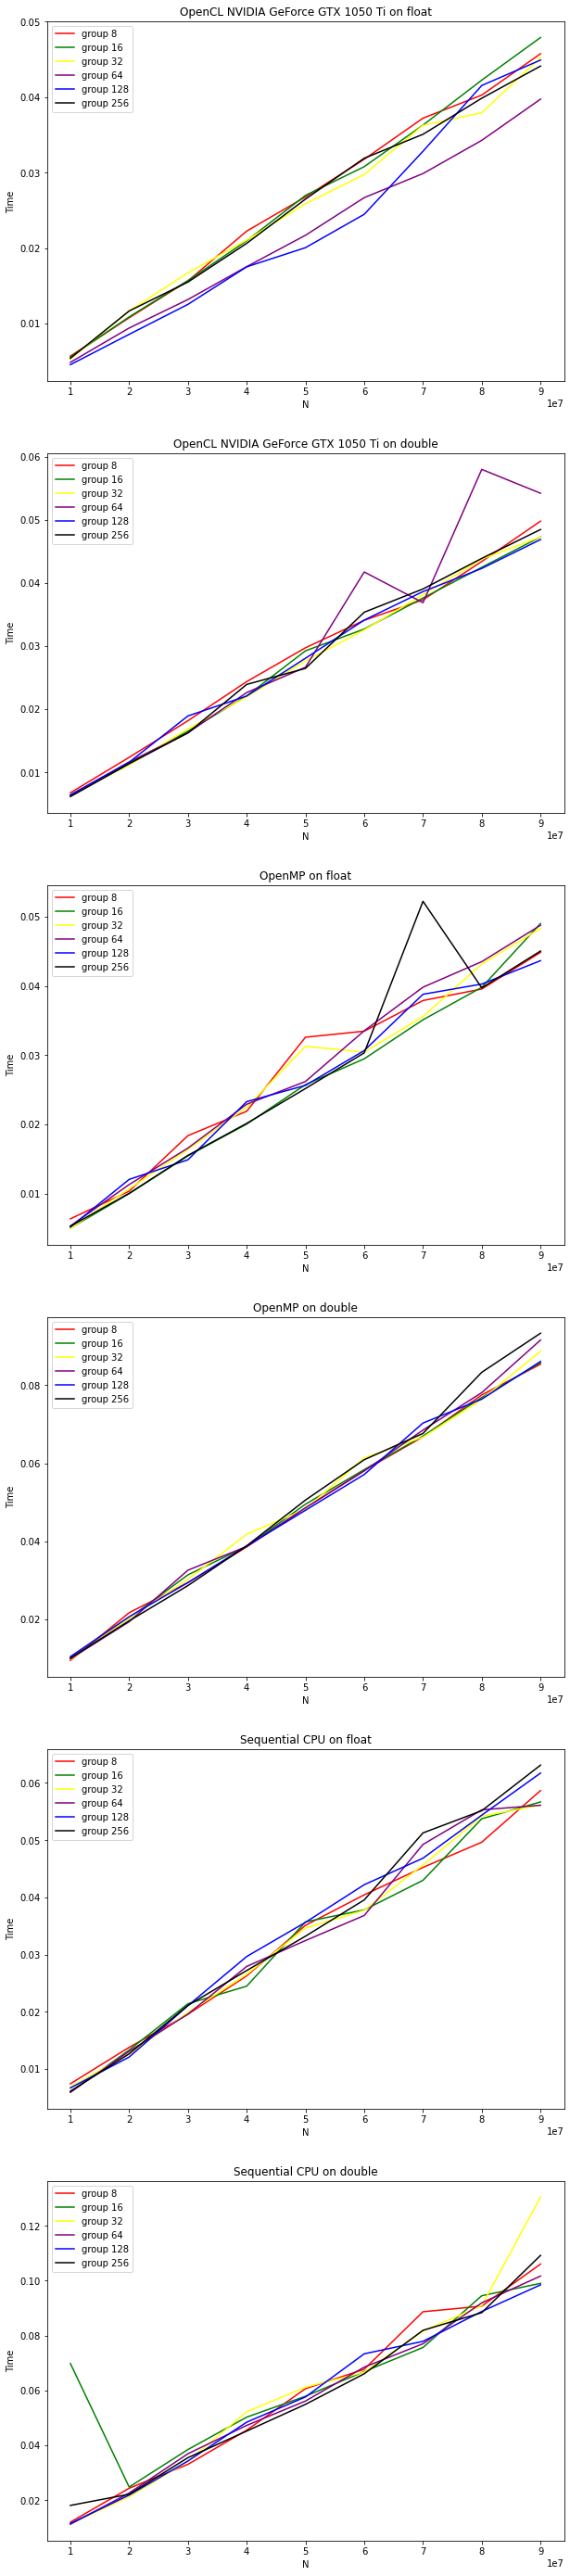

In [2]:
import matplotlib.pyplot as plt

global_index = 0
cnt_devices = 3
cnt_groups = 6
cnt_n = 9

f, axs = plt.subplots(cnt_devices * 2,1,figsize=(10,50))
index_axs = 0

devices_name = []
results = []
n_list = []

for device in range(cnt_devices):
    device_name = text[global_index]
    devices_name.append(device_name)
    global_index += 1
    
    
    float_groups = list()
    for group in range(cnt_groups):
        one_group = list()
        for n in range(cnt_n):
            one_group.append(float(text[global_index].split()[6]))
            global_index += 1
        float_groups.append(one_group)
        
    double_groups = list()
    for group in range(cnt_groups):
        one_group = list()
        n_list = list()
        for n in range(cnt_n):
            one_group.append(float(text[global_index].split()[6]))
            n_list.append(int(text[global_index].split()[2]))
            global_index += 1
        double_groups.append(one_group)

    results.append(float_groups)
    results.append(double_groups)
    
    axs[index_axs].plot(
        n_list, float_groups[0], 'red',
        n_list, float_groups[1], 'green',
        n_list, float_groups[2], 'yellow',
        n_list, float_groups[3], 'purple',
        n_list, float_groups[4], 'blue',
        n_list, float_groups[5], 'black',
    )
    axs[index_axs].legend(['group 8', 'group 16', 'group 32', 'group 64', 'group 128', 'group 256'])
    axs[index_axs].set_title(device_name + ' on float')
    axs[index_axs].set_xlabel('N')
    axs[index_axs].set_ylabel('Time')
    index_axs += 1
    
    axs[index_axs].plot(
        n_list, double_groups[0], 'red',
        n_list, double_groups[1], 'green',
        n_list, double_groups[2], 'yellow',
        n_list, double_groups[3], 'purple',
        n_list, double_groups[4], 'blue',
        n_list, double_groups[5], 'black',
    )
    axs[index_axs].legend(['group 8', 'group 16', 'group 32', 'group 64', 'group 128', 'group 256'])
    axs[index_axs].set_title(device_name + ' on double')
    axs[index_axs].set_xlabel('N')
    axs[index_axs].set_ylabel('Time')
    index_axs += 1


plt.show()
    

In [3]:
def compare_devices(device1, device2):
    global cnt_groups, cnt_n, results, devices_name
    f, axs = plt.subplots(2,1,figsize=(10,10))
    float_compare = []
    for group in range(cnt_groups):
        cur = []
        for n in range(cnt_n):
            cur.append(results[device2 * 2][group][n] / results[device1 * 2][group][n])
        float_compare.append(cur)
    
    double_compare = []
    for group in range(cnt_groups):
        cur = []
        for n in range(cnt_n):
            cur.append(results[device2 * 2 + 1][group][n] / results[device1 * 2 + 1][group][n])
        double_compare.append(cur)
        
    index_axs = 0
    axs[index_axs].plot(
        n_list, float_compare[0], 'red',
        n_list, float_compare[1], 'green',
        n_list, float_compare[2], 'yellow',
        n_list, float_compare[3], 'purple',
        n_list, float_compare[4], 'blue',
        n_list, float_compare[5], 'black',
    )
    axs[index_axs].legend(['group 8', 'group 16', 'group 32', 'group 64', 'group 128', 'group 256'])
    axs[index_axs].set_title(devices_name[device1] + ' vs ' + devices_name[device2] + ' on float')
    axs[index_axs].set_xlabel('N')
    axs[index_axs].set_ylabel('Speedup')
    index_axs += 1
    
    axs[index_axs].plot(
        n_list, double_compare[0], 'red',
        n_list, double_compare[1], 'green',
        n_list, double_compare[2], 'yellow',
        n_list, double_compare[3], 'purple',
        n_list, double_compare[4], 'blue',
        n_list, double_compare[5], 'black',
    )
    axs[index_axs].legend(['group 8', 'group 16', 'group 32', 'group 64', 'group 128', 'group 256'])
    axs[index_axs].set_title(devices_name[device1] + ' vs ' + devices_name[device2] + ' on double')
    axs[index_axs].set_xlabel('N')
    axs[index_axs].set_ylabel('Speedup')
    index_axs += 1
    
    plt.show()

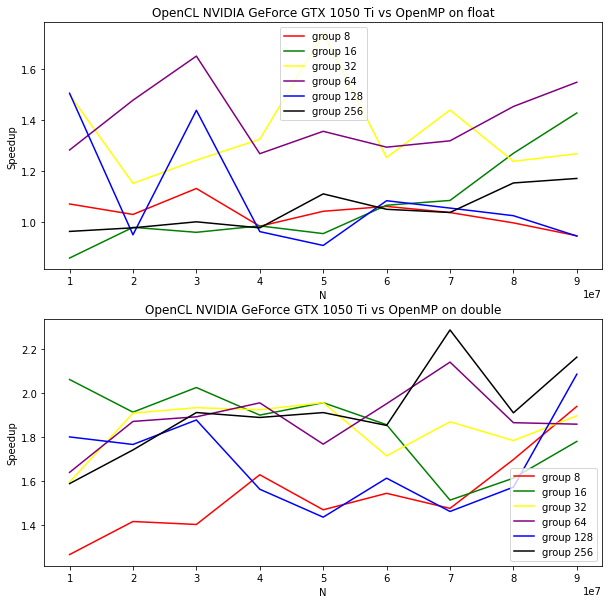

In [13]:
compare_devices(0, 1)

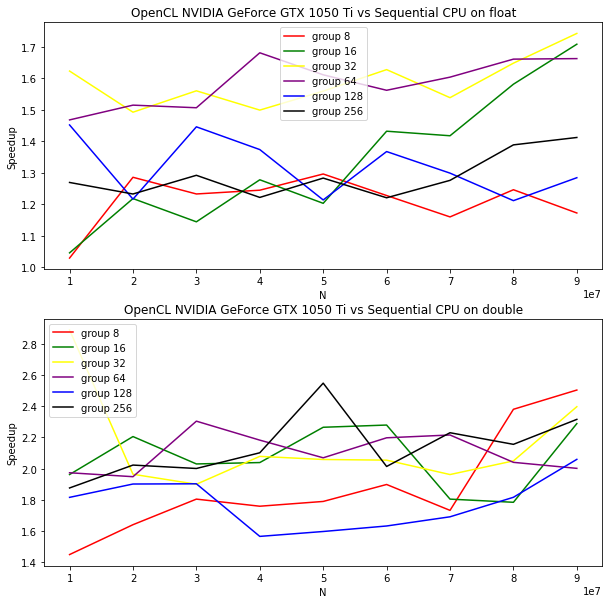

In [14]:
compare_devices(0, 2)

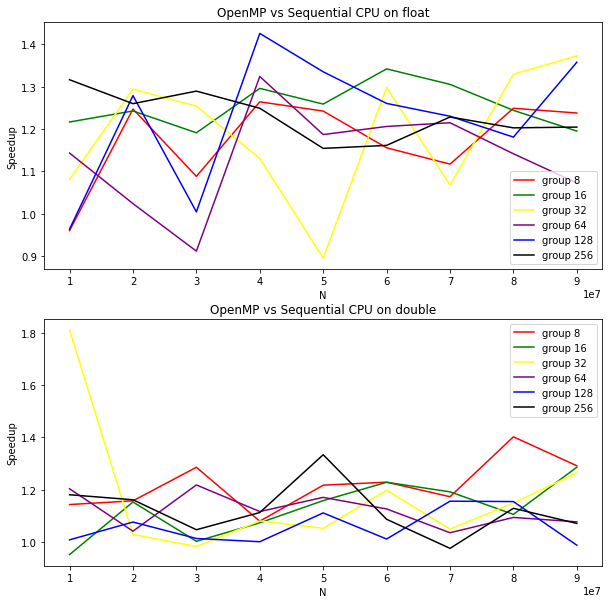

In [15]:
compare_devices(1, 2)